# Structure functions with latlon grids

In [1]:
import warnings

import matplotlib_inline.backend_inline
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")  # Ignore warnings for the purpose of this tutorial

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

## Create a 2D velocity field on a latlon grid

In [13]:
nx, ny = 100, 100
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(y, x)
latitudes = np.linspace(0, 1/111111, nx)
longitudes = np.linspace(0, 1/111111, ny)

lons, lats = np.meshgrid(longitudes, latitudes)

u = X
v = 0.5 * X

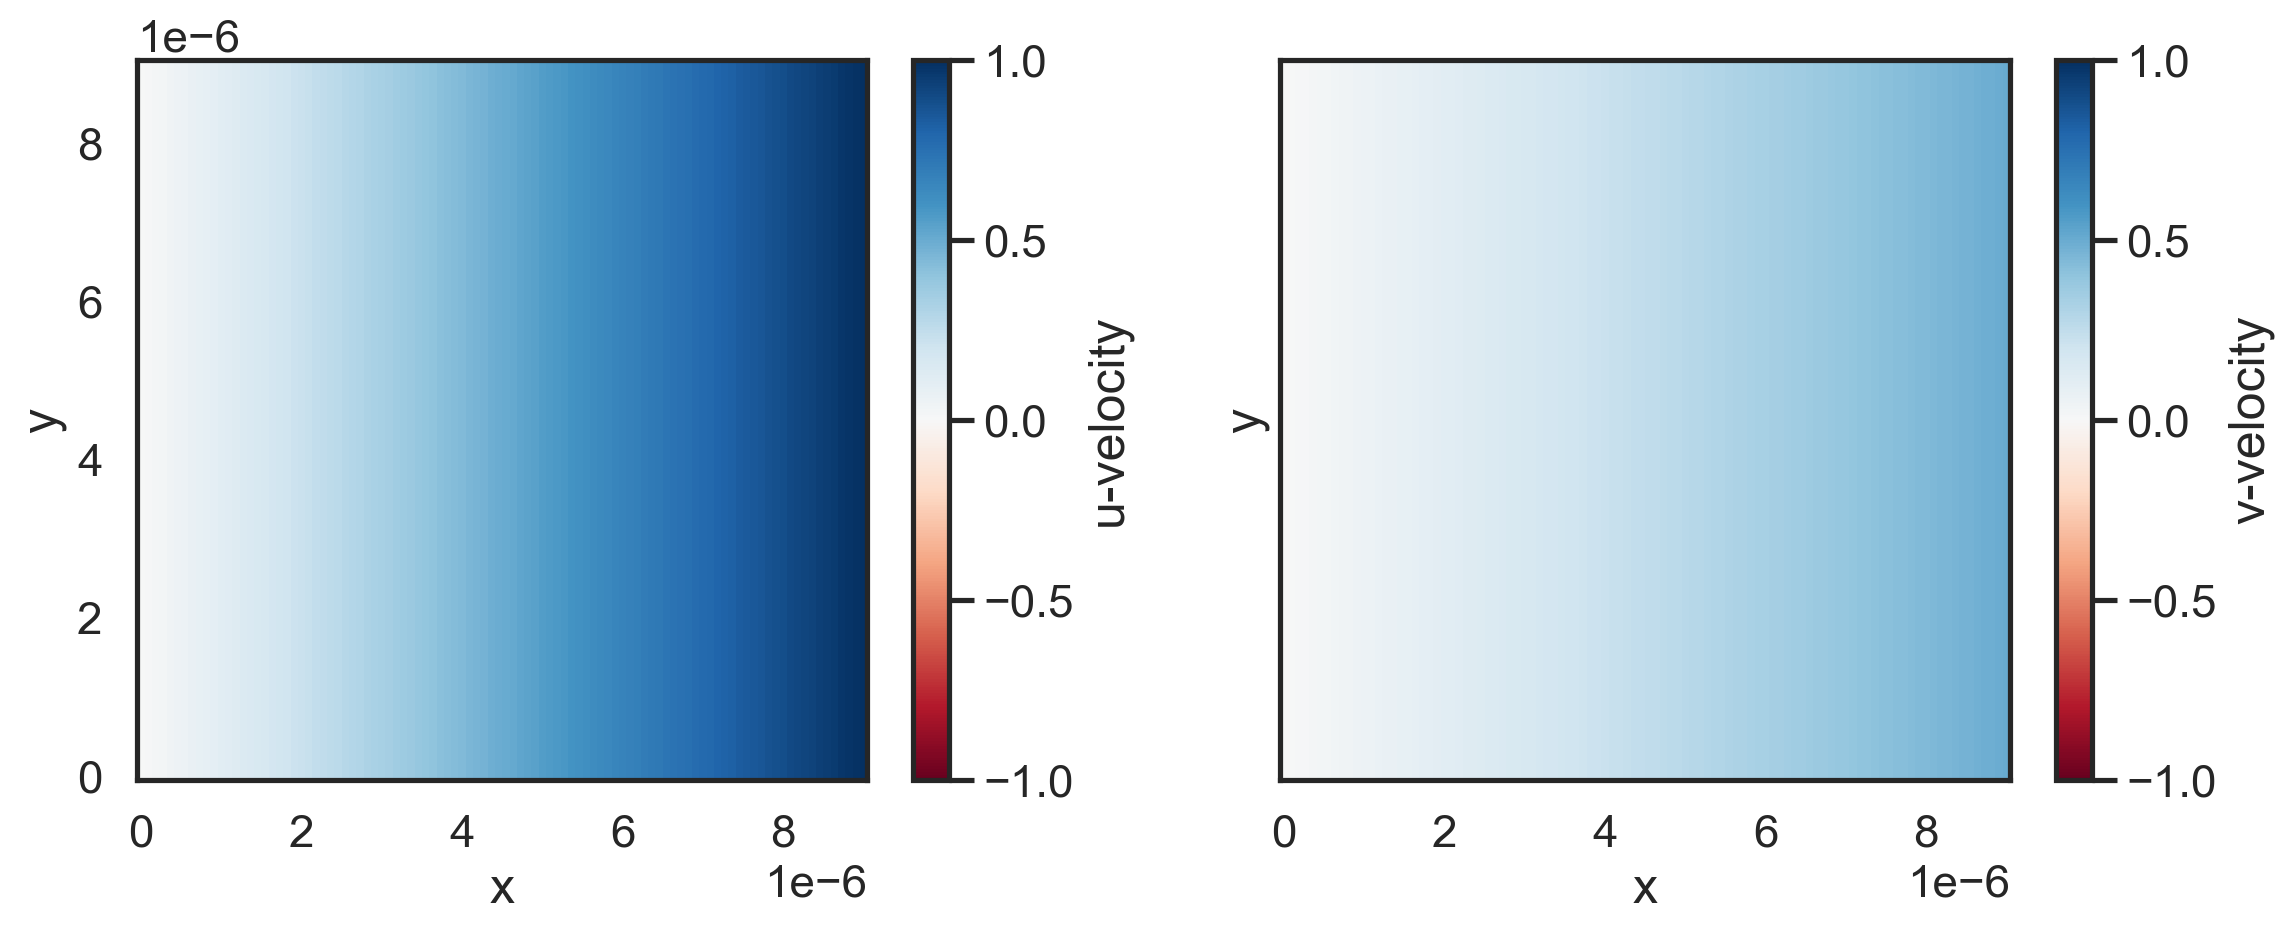

In [14]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))
p1 = ax1.pcolormesh(lons, lats, u, cmap="RdBu", vmin=-1, vmax=1)
p2 = ax2.pcolormesh(lons, lats, v, cmap="RdBu", vmin=-1, vmax=1)
fig.colorbar(p1, label="u-velocity")
fig.colorbar(p2, label="v-velocity")
ax1.set_xlabel("x")
ax2.set_xlabel("x")
ax1.set_ylabel("y")
ax2.set_ylabel("y")
plt.tight_layout()

## Generate structure functions

In [15]:
import fluidsf

sf = fluidsf.generate_structure_functions(
    u=u,
    v=v,
    lats=lats,
    lons=lons,
    sf_type=["ASF_V", "LLL", "LL", "LTT"],
    boundary=None,
    grid_type="latlon",
    nbins=90,
)

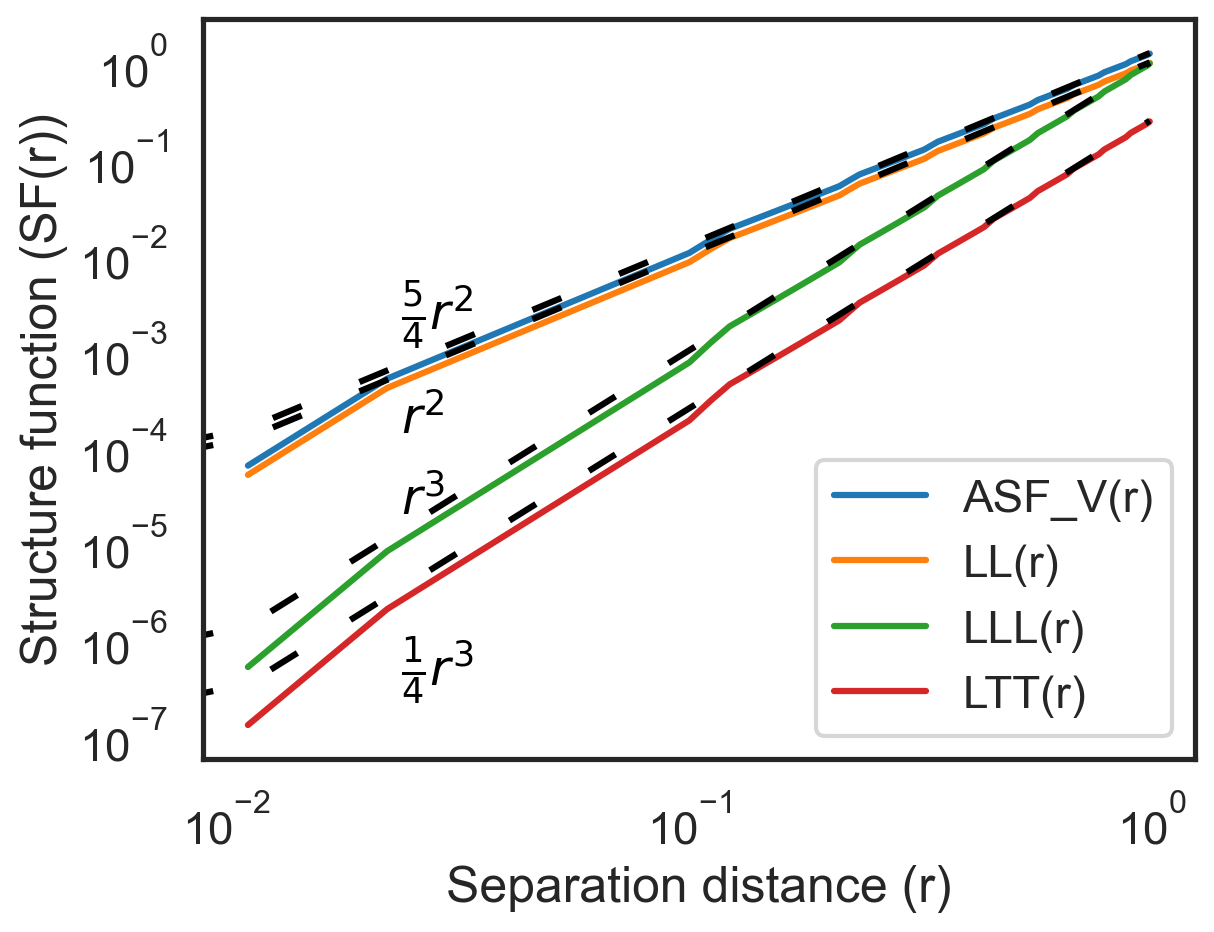

In [16]:
fig, ax = plt.subplots()
ax.loglog(sf["x-diffs"], sf["SF_advection_velocity_x"], label="ASF_V(r)", color="C0")
ax.loglog(sf["x-diffs"], sf["SF_LL_x"], label="LL(r)", color="C1")
ax.loglog(sf["x-diffs"], sf["SF_LLL_x"], label="LLL(r)", color="C2")
ax.loglog(sf["x-diffs"], sf["SF_LTT_x"], label="LTT(r)", color="C3")
ax.loglog(
    sf["x-diffs"],
    (5 / 4) * sf["x-diffs"] ** 2,
    color="k",
    linestyle=(0, (5, 10)),
)
ax.loglog(sf["x-diffs"], sf["x-diffs"] ** 2, color="k", linestyle=(0, (5, 10)))
ax.loglog(sf["x-diffs"], sf["x-diffs"] ** 3, color="k", linestyle=(0, (5, 10)))
ax.loglog(
    sf["x-diffs"],
    0.25 * sf["x-diffs"] ** 3,
    color="k",
    linestyle=(0, (5, 10)),
)

ax.annotate(
    r"$\frac{5}{4}r^{2}$",
    (0.2, 0.58),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$r^{2}$",
    (0.2, 0.44),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$r^{3}$",
    (0.2, 0.33),
    textcoords="axes fraction",
    color="k",
)

ax.annotate(
    r"$\frac{1}{4}r^{3}$",
    (0.2, 0.1),
    textcoords="axes fraction",
    color="k",
)

plt.hlines(0, 0, 1, color="k", lw=1, zorder=0)
ax.set_xlabel("Separation distance (r)")
ax.set_ylabel("Structure function (SF(r))")
ax.legend(loc="lower right")
plt.show()